In [3]:
import pandas as pd
import pyarrow
from datetime import datetime, timedelta
import calendar
# from prophet import Prophet
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Input data 

In [178]:
# input_df=pd.read_csv('data/input_data.csv')
# input_df.columns=['index','date_balance','cnt','dpd30_cnt','rate','predict']
# input_df.to_parquet('data/input_data.parquet',engine='pyarrow')

In [179]:
input_df=pd.read_parquet('data/input_data.parquet')

In [180]:
input_df.columns

Index(['index', 'date_balance', 'cnt', 'dpd30_cnt', 'rate', 'predict'], dtype='object')

In [181]:
def nearest_4th_diff(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    if date.day >= 4:
        # If the day of the given date is after the 4th, use the 4th of the same month
        nearest_4th_date = date.replace(day=4)
    else:
        # If the day is on or before the 4th, go to the previous month
        previous_month = date.replace(day=1) - timedelta(days=1)
        nearest_4th_date = previous_month.replace(day=4)
    
    # Calculate the difference in days
    date_diff = (date - nearest_4th_date).days
    return nearest_4th_date.strftime('%Y-%m-%d'), date_diff

In [182]:
def month_and_days(date_str):
    date = datetime.strptime(date_str, '%Y-%m-%d')
    month_number = date.month
    days_in_month = calendar.monthrange(date.year, date.month)[1]
    return month_number, days_in_month


In [183]:
input_df[['nearest_4th', 'date_diff']] = input_df['date_balance'].apply(nearest_4th_diff).apply(pd.Series)
input_df[['month_number', 'days_in_month']] = input_df['date_balance'].apply(month_and_days).apply(pd.Series)


In [184]:
input_df.to_parquet('data/input_data.parquet',engine='pyarrow')

## Overview 

The data consists of the daily rate of DPD30+ for a banking product. 
The goal is to forecast the daily rate for future dates to assist in management decision-making.

Data doesn't have much variable so go straight to fitting to see how prediction works

The trend so seasonal fluctuation which drammatically increase 30 days after due date ( 4th monthly ) drop after ward


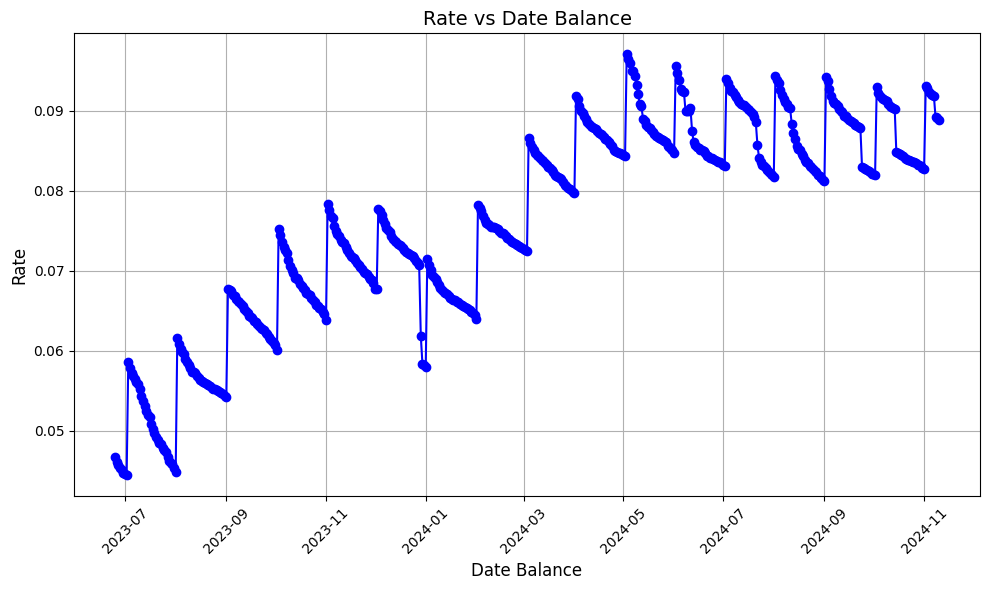

In [188]:

# Assuming input_df is already defined and contains 'date_balance' and 'rate' columns
# First, we will convert 'date_balance' to a datetime object to ensure proper plotting
input_df['date_balance'] = pd.to_datetime(input_df['date_balance'])

# Plotting the 'rate' values over 'date_balance'
plt.figure(figsize=(10, 6))
plt.plot(input_df['date_balance'], input_df['rate'], marker='o', linestyle='-', color='b')

# Adding titles and labels
plt.title('Rate vs Date Balance', fontsize=14)
plt.xlabel('Date Balance', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
print('The trend so seasonal fluctuation which drammatically increase 30 days after due date ( 4th monthly ) drop after ward')
# Display the plot
plt.show()